In [17]:
import random
import time
from pyibl import Agent
import matplotlib.pyplot as plt

agent= Agent(name="My Agent")
agent.default_utility = 4.3

options = ['Safe', 'Risky']

In [18]:
import time # to calculate time
participant = 100 # number of runs (participants)
trials = 100 #number of trial
average_safe = [] # store the average performance of safe choices for each participant.
average_risky = [] #  store the average performance of risky choices for each participant.
average_time = [] #store the time taken for each trial for each participant.
''
for p in range(participant):
  rmax = [] #to store whether the choices made were risky or safe, respectively.
  smax=[] 
  ttime = [0] #tore the cumulative time taken for each trial.
  agent.reset() #clear the memory for a new paricipants
    
    
  for i in range(trials):     
    start = time.time()
    
    #f 'Safe' is chosen, the agent responds with 3.
    #If 'Risky' is chosen, there's a probability of 80% that the agent responds with 4,
    #and a 20% chance of responding with 0.
    choice = agent.choose(options) #binary choices 
    if choice == 'Safe':
      agent.respond(3)
    elif random.random() <= 0.8:
      agent.respond(4)
    else:
      agent.respond(0)
    # store the instance
    end = time.time()
    ttime.append(ttime[-1]+ end - start)
    rmax.append(choice == 'Risky') 
    smax.append(choice=='Safe')
    
  average_safe.append(smax) # save performance of each participants in safe
  average_risky.append (rmax)
  average_time.append(ttime) # save time of each run 

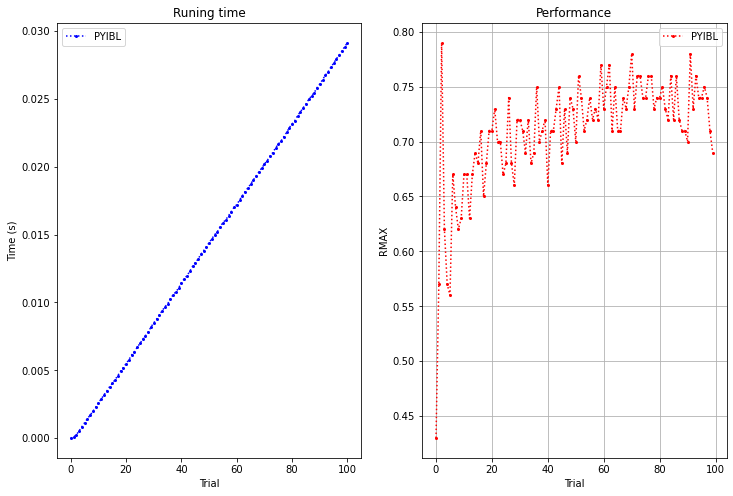

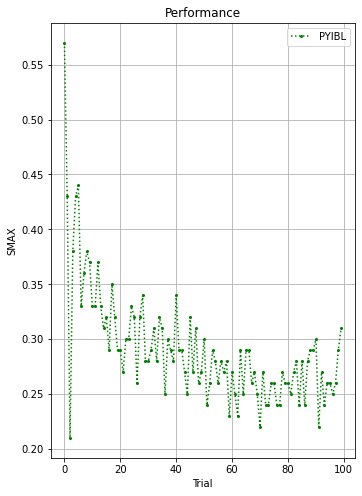

In [19]:
import matplotlib.pyplot as plt
import numpy as np 
plt.rcParams["figure.figsize"] = (12,8)
plt.subplot(int('12'+str(1)))
##calculate the mean time across all participants for each trial
plt.plot(range(trials+1), np.mean(np.asarray(average_time),axis=0), 'o-', color='blue', markersize=2, linestyle='dotted', label='PYIBL')
plt.xlabel('Trial')
plt.ylabel('Time (s)')
plt.title('Runing time')
plt.legend()

#calculate the mean performance across all participants for each trial for choice safe.
plt.subplot(int('12'+str(2)))
plt.plot(range(trials), np.mean(np.asarray(average_risky),axis=0), 'o-', color='red', markersize=2, linestyle='dotted', label='PYIBL')
plt.xlabel('Trial')
plt.ylabel('RMAX')

plt.title('Performance')
plt.legend()
plt.grid(True)
plt.show()

plt.subplot(int('12'+str(2)))
plt.plot(range(trials), np.mean(np.asarray(average_safe),axis=0), 'o-', color='green', markersize=2, linestyle='dotted', label='PYIBL')
plt.xlabel('Trial')
plt.ylabel('SMAX')
plt.title('Performance')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
agent.instances()

+----------+---------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| decision | outcome | created |                                                                                                                occurrences                                                                                                                 |
+----------+---------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|  Risky   |    4    |    1    | [1, 3, 9, 10, 11, 25, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 60, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 74, 75, 77, 78,